### 전처리하기

In [36]:
import numpy as np
import pandas as pd

adr_df = pd.read_excel("./data/광진구_데이터프레임xlsx.xlsx",index_col=0)

In [37]:
adr_df.set_index("지번주소",inplace=True) # 인덱스 설정
adr_df.drop(columns=["도로명주소","위도","경도","소지역코드"],inplace=True) # 안쓸 데이터 드랍

In [38]:
adr_df.info() # 타입확인 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Index: 23216 entries, 서울특별시 광진구 광장동 102 to 서울특별시 광진구 화양동 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23216 non-null  float64
 1   총 사업체수                23216 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23216 non-null  int64  
 3   주차장과의최단거리             23216 non-null  int64  
 4   토지면적                  23216 non-null  float64
 5   공시지가_기준년월             23213 non-null  object 
 6   공시지가(원/면적)            23213 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ MB


### 결측치 삭제

In [39]:
adr_df.dropna(inplace=True)

### 타입변환

In [40]:
adr_df["토지면적"] = pd.to_numeric(adr_df["토지면적"])

In [41]:
adr_df["공시지가(원/면적)"] = adr_df["공시지가(원/면적)"].astype(int)

### 공시지가_기준년월 2013->0, 2014-> 1, 2015-> 2, 2016-> 3, 2022/01-> 4, 2022/07->5

In [42]:
adr_df["공시지가_기준년월"].unique()

array(['2022년01월', '2022년07월', '2014년01월', '2013년01월', '2016년01월',
       '2015년01월'], dtype=object)

In [43]:
adr_df["공시지가_기준년월"].replace({"2013년01월":0,"2014년01월":1,"2015년01월":2,"2016년01월":3,"2022년01월":4,"2022년07월":5},inplace=True) 

In [44]:
adr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23213 entries, 서울특별시 광진구 광장동 102 to 서울특별시 광진구 화양동 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23213 non-null  float64
 1   총 사업체수                23213 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23213 non-null  int64  
 3   주차장과의최단거리             23213 non-null  int64  
 4   토지면적                  23213 non-null  float64
 5   공시지가_기준년월             23213 non-null  int64  
 6   공시지가(원/면적)            23213 non-null  int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 1.3+ MB


In [45]:
adr_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가_기준년월,공시지가(원/면적)
지번주소,,,,,,,
서울특별시 광진구 광장동 102,7067.7,136,2,51,2211.8,4,6324000
서울특별시 광진구 광장동 104,7067.7,136,2,21,172.1,5,5097000
서울특별시 광진구 광장동 105,7067.7,136,2,3,848.8,4,5202000
서울특별시 광진구 광장동 106,7067.7,136,2,27,452.8,4,5097000
서울특별시 광진구 광장동 107,7067.7,136,2,50,403.9,4,5793000
...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.1,44,28,44,152.0,4,4346000
서울특별시 광진구 화양동 96-2,52366.1,44,31,52,165.0,4,4346000
서울특별시 광진구 화양동 97,52366.1,44,28,54,188.0,4,5095000


### EDA

### 폰트 설정하기

In [46]:
def get_font():
    import matplotlib.font_manager as font_manager
    import matplotlib as mpl
# Add every font at the specified location
    font_dir = ['C:/Users/gihun/Fonts/']
    for font in font_manager.findSystemFonts(fontpaths=font_dir):
        print(mpl.font_manager.FontProperties(fname=font).get_name())
        font_manager.fontManager.addfont(font)
# Set font family globally
    mpl.rcParams['font.family'] = 'Nanum Brush Script OTF'
    return mpl.rcParams['font.family']

In [16]:
get_font()

Nanum HanYunCe
Nanum JinJuBagGyeongACe
NanumBarunpenOTF
Nanum JeomGgorCe
Nanum OenSonJabIDoYeBbeo
Nanum DarEuiGweDo
Nanum MiRaeNaMu
Nanum YaCaeJangSuBaegGeumRye
NanumBarunpen
Nanum SangHaeCanMiCe
Nanum URiDdarSonGeurSsi
Nanum AGiSaRangCe
Nanum SeACe
NanumSquare Neo OTF Heavy
Nanum AInMamSonGeurSsi
Nanum Brush Script OTF
Nanum BuJangNimNunCiCe
Nanum HaNaSonGeurSsi
Nanum SiUGwiYeoWeo
Nanum SinHonBuBu
D2Coding ligature
Nanum DaSiSiJagHae
Nanum DdarEGeEomMaGa
Nanum OgBiCe
Nanum MaGoCe
Nanum DaJinCe
Nanum DdaDdeusHanJagByeor
Nanum MasIssNeunCe
Nanum BiSangCe
NanumBarunGothic YetHangul
NanumSquare Neo OTF Light
Nanum DaCaeSaRang
Nanum Pen Script OTF
NanumSquare Neo OTF ExtraBold
Nanum HarABeoJiEuiNaNum
Nanum AmSeuTeReuDam
Nanum YeDangCe
NanumBarunpen
Nanum SoMiCe
Nanum NaMuJeongWeon
Nanum GimYuICe
Nanum JarHaGoIssEo
Nanum KoKoCe
Nanum HaengBogHanDoBi
Nanum HeuiMangNuRi
Nanum GoDigANiGoGoDing
Nanum BanJjagBanJjagByeor
NanumBarunpenOTF
Nanum JaBuSimJiU
Nanum CeorPirGeurSsi
Nanum GaRamYeonGgoc


['Nanum Brush Script OTF']

In [47]:
# 기초통계량 확인하기
adr_df.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가_기준년월,공시지가(원/면적)
count,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,2.321300e+04
mean,34900.199065,66.497480,21.409555,85.701590,360.372390,3.999138,5.188785e+06
std,14909.802802,75.688845,8.303961,55.804366,3905.284235,0.077100,1.905761e+06
min,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.900000e+04
25%,24129.400000,27.000000,15.000000,43.000000,125.500000,4.000000,4.186000e+06
50%,36796.500000,48.000000,22.000000,75.000000,162.600000,4.000000,4.905000e+06
75%,46032.500000,79.000000,28.000000,116.000000,217.500000,4.000000,5.647000e+06
max,138678.800000,1448.000000,45.000000,455.000000,501359.000000,5.000000,4.750000e+07


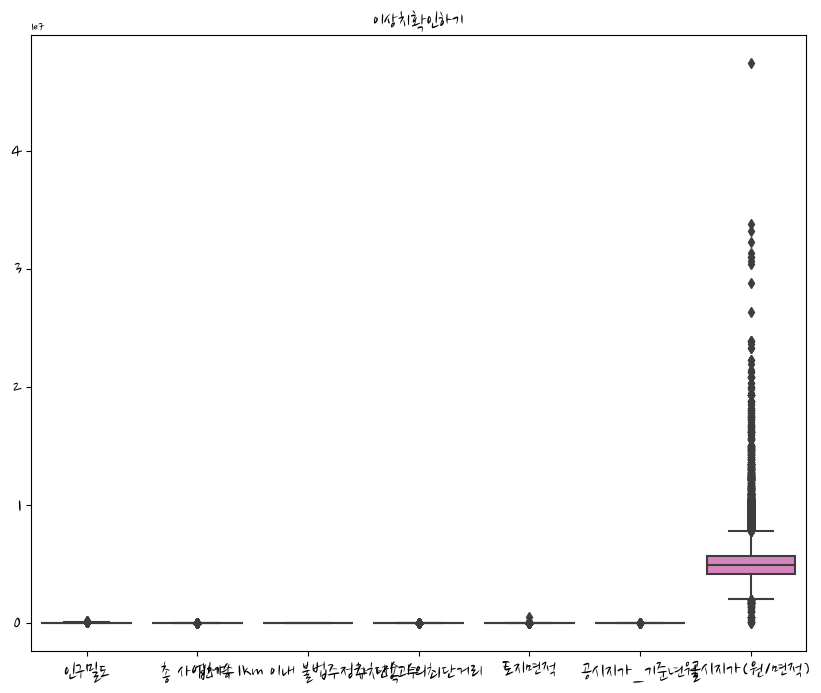

In [48]:
# 이상치 확인하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(adr_df)
plt.title("이상치확인하기",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [49]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [50]:
adr_df = remove_outliers(adr_df, "공시지가(원/면적)")

c:\Users\gihun\Python_Data\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


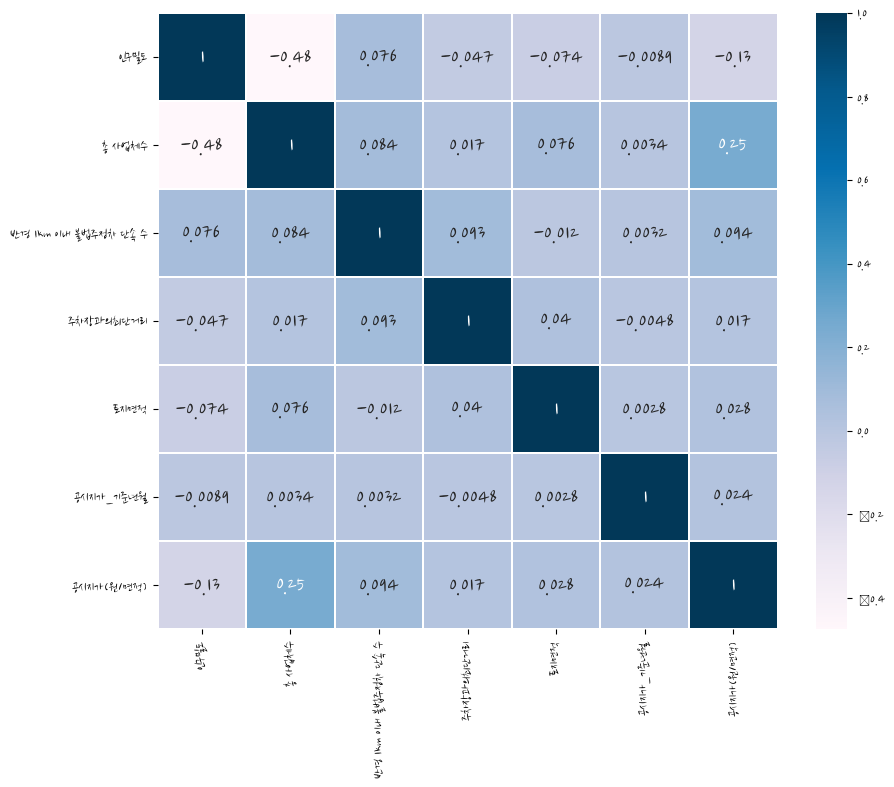

In [55]:
### 변수간 상관관계 분석하기
corr = adr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=plt.cm.PuBu,annot=True, annot_kws = {"size" : 16},linecolor = "white",linewidths = 0.1)
plt.show()

### 정규성 검정하기

In [56]:
def get_shapiro(df,column_name):
    from scipy import stats
    # 샤피로 검정
    statistic, pvalue = stats.shapiro(df[column_name])
    # 결과 출력
    print(f'statistic: {statistic:.4f}, p-value: {pvalue:.6f}')
    if pvalue > 0.05:
        print('Data follows normal distribution')
    else:
        print('Data does not follow normal distribution')

In [57]:
for item in list(adr_df.columns):
    print(item)
    get_shapiro(adr_df,item) # 공시지가_기준년월은 범주형 변수이므로 제외하기

인구밀도
statistic: 0.9753, p-value: 0.000000
Data does not follow normal distribution
총 사업체수
statistic: 0.5461, p-value: 0.000000
Data does not follow normal distribution
반경 1km 이내 불법주정차 단속 수
statistic: 0.9650, p-value: 0.000000
Data does not follow normal distribution
주차장과의최단거리
statistic: 0.9303, p-value: 0.000000
Data does not follow normal distribution
토지면적
statistic: 0.0549, p-value: 0.000000
Data does not follow normal distribution
공시지가_기준년월
statistic: 0.0065, p-value: 0.000000
Data does not follow normal distribution
공시지가(원/면적)
statistic: 0.9860, p-value: 0.000000
Data does not follow normal distribution


c:\Users\gihun\Python_Data\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
adr_df.dropna()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가_기준년월,공시지가(원/면적)
지번주소,,,,,,,
서울특별시 광진구 광장동 102,7067.7,136,2,51,2211.8,4,6324000
서울특별시 광진구 광장동 104,7067.7,136,2,21,172.1,5,5097000
서울특별시 광진구 광장동 105,7067.7,136,2,3,848.8,4,5202000
서울특별시 광진구 광장동 106,7067.7,136,2,27,452.8,4,5097000
서울특별시 광진구 광장동 107,7067.7,136,2,50,403.9,4,5793000
...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.1,44,28,44,152.0,4,4346000
서울특별시 광진구 화양동 96-2,52366.1,44,31,52,165.0,4,4346000
서울특별시 광진구 화양동 97,52366.1,44,28,54,188.0,4,5095000


In [60]:
def plot_histograms(df):
    for column in df.columns:
        plt.hist(df[column], bins=20)
        plt.title(column)
        plt.show()

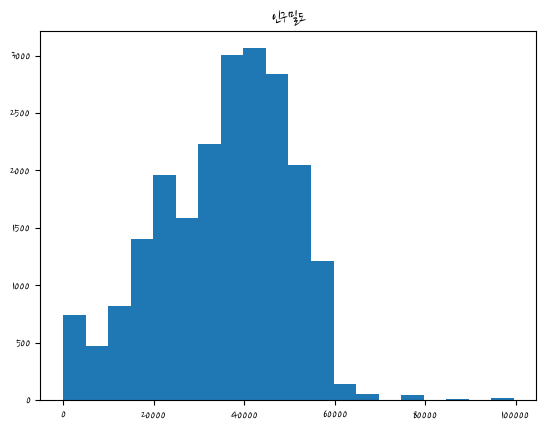

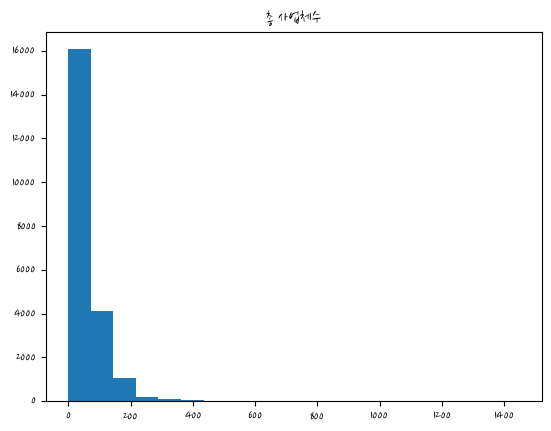

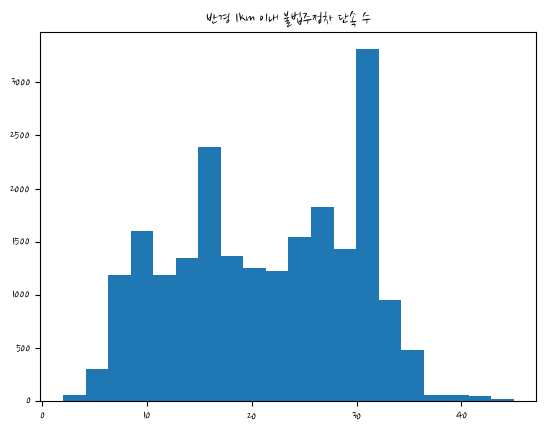

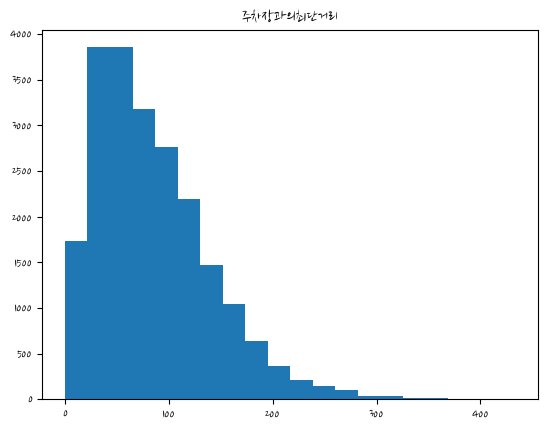

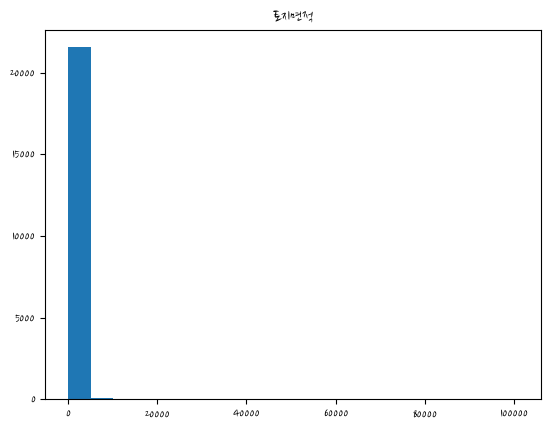

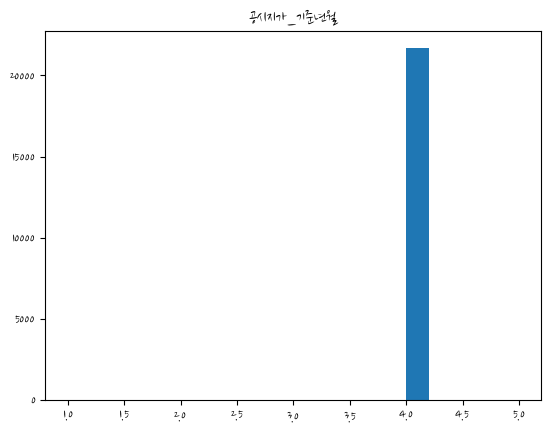

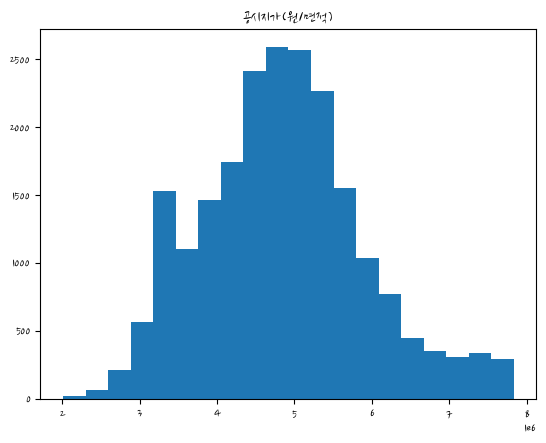

In [26]:
plot_histograms(adr_df)

### 양수 인것들만 로그 변환해서 데이터 분포 변환하기

In [61]:
def log_transform(dataframe, columns):
    for column in columns:
        filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
        dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

In [62]:
log_transform(adr_df, adr_df.columns)

C:\Users\gihun\AppData\Local\Temp\ipykernel_4720\1113042258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = np.log(filtered) # apply log transformation


,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가_기준년월,공시지가(원/면적)
지번주소,,,,,,,
서울특별시 광진구 광장동 102,8.863290,4.912655,0.693147,3.931826,7.701562,1.386294,15.659862
서울특별시 광진구 광장동 104,8.863290,4.912655,0.693147,3.044522,5.148076,1.609438,15.444163
서울특별시 광진구 광장동 105,8.863290,4.912655,0.693147,1.098612,6.743824,1.386294,15.464554
서울특별시 광진구 광장동 106,8.863290,4.912655,0.693147,3.295837,6.115451,1.386294,15.444163
서울특별시 광진구 광장동 107,8.863290,4.912655,0.693147,3.912023,6.001167,1.386294,15.572161
...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,10.866015,3.784190,3.332205,3.784190,5.023881,1.386294,15.284766
서울특별시 광진구 화양동 96-2,10.866015,3.784190,3.433987,3.951244,5.105945,1.386294,15.284766
서울특별시 광진구 화양동 97,10.866015,3.784190,3.332205,3.988984,5.236442,1.386294,15.443770


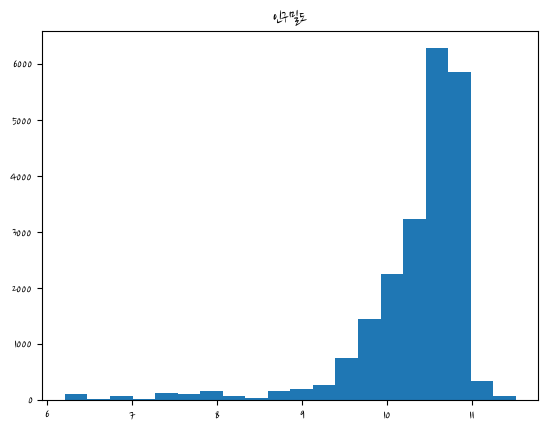

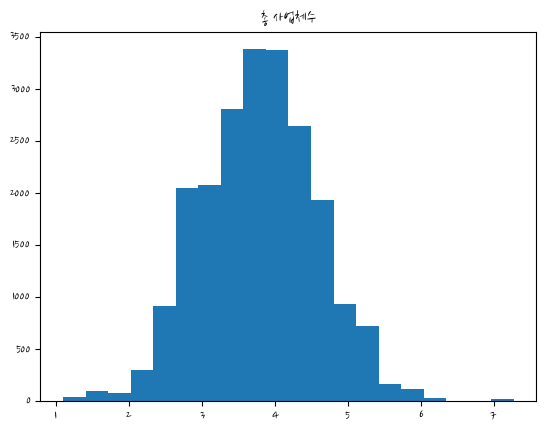

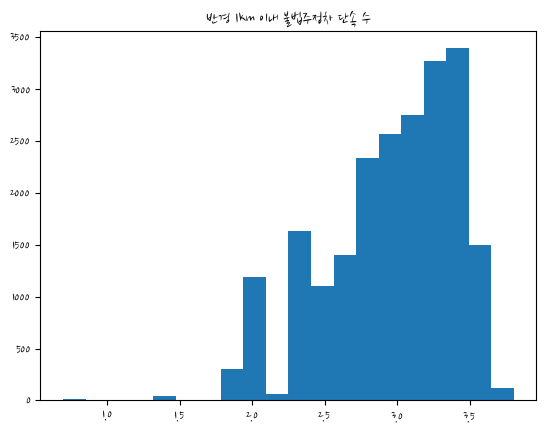

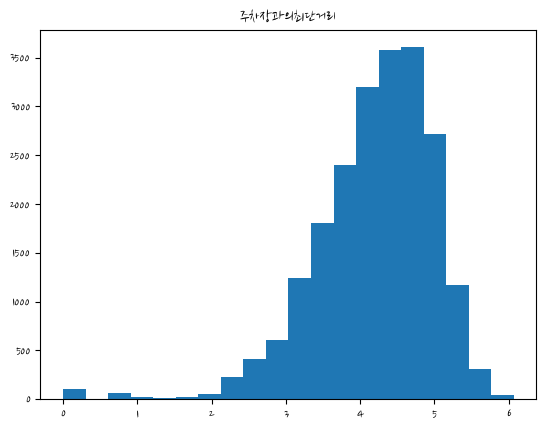

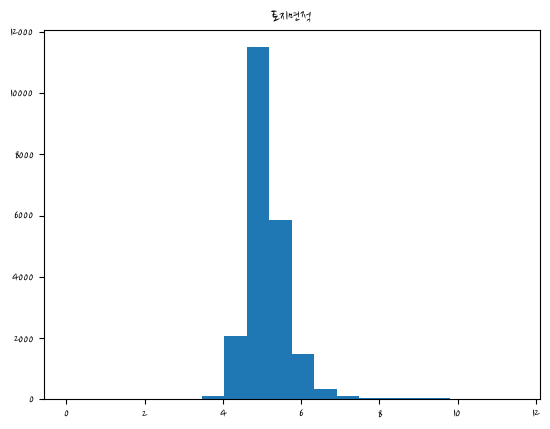

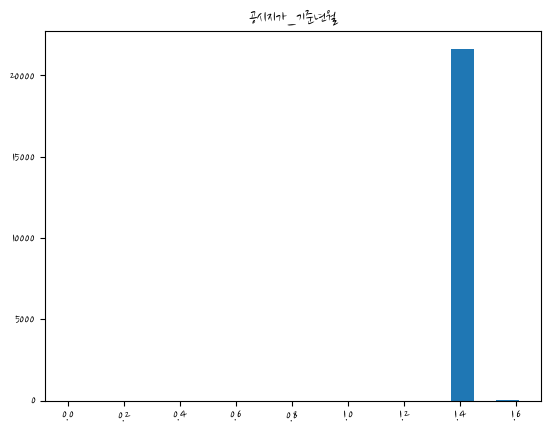

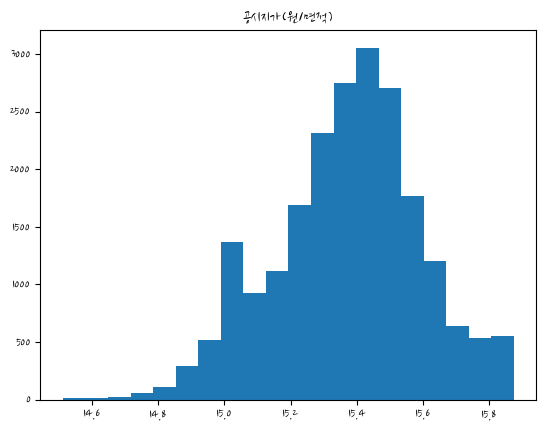

In [63]:
plot_histograms(adr_df)

### Box-cow 변환

In [74]:
adr_df.columns

Index(['인구밀도', '총 사업체수', '반경 1km 이내 불법주정차 단속 수', '주차장과의최단거리', '토지면적',
       '공시지가_기준년월', '공시지가(원/면적)'],
      dtype='object')

In [69]:
adr_df.dropna(inplace=True) # 로그 변환

c:\Users\gihun\Python_Data\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### UMAP

In [86]:
import umap
embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(adr_df.values)

### HDBSCAN 클러스터링

In [90]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(embedding)

In [99]:
def get_all_cluster(embedding,labels):
    # 노이즈 포인트 다 포함
    plt.scatter(embedding[:, 0], embedding[:, 1],
                c=labels,s=0.1, cmap='Spectral')
def get_noise_cluster(embedding,labels):
    # 노이즈 포인트만
    clustered = (labels >= 0)
    plt.scatter(embedding[~clustered, 0],
                embedding[~clustered, 1],
                color=(0.5, 0.5, 0.5),
                s=0.1,
                alpha=0.5)
def get_cluster(embedding,labels):
    # 노이즈 포인트 제외
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                c=labels[clustered],
                s=0.1,
                cmap='Spectral')

C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


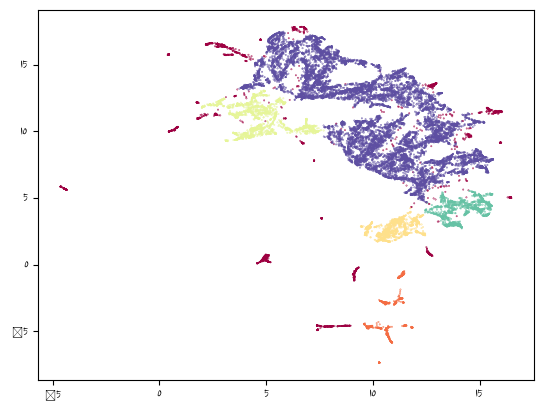

In [100]:
get_all_cluster(clusterable_embedding,labels)

C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


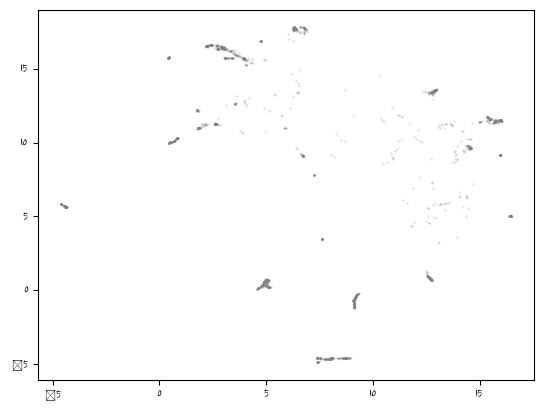

In [101]:
get_noise_cluster(clusterable_embedding,labels)

C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


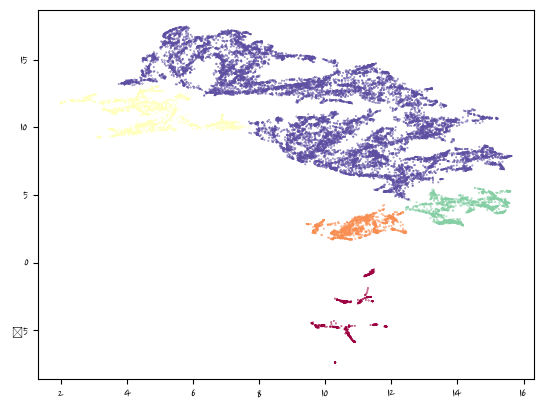

In [102]:
get_cluster(clusterable_embedding,labels)

### 공시지가_기준년월 지우고 해보기